Caixeiro com Gasolina Infinita
========================================



## Introdução



 Considere um número $n\geq 7$ de coordenadas $(x,y)$ de cidades e que o caixeiro tenha combustível infinito. Você pode gerar as coordenadas de forma aleatória ou simplesmente usar as coordenadas que desejar. O caixeiro só anda em linha reta e apenas entre duas cidades. O caixeiro começa e termina seu trajeto na mesma cidade e, fora a cidade inicial, ele não visita nenhuma outra cidade mais de uma vez.

## Objetivo



Encontre o caminho de *maior* distância no problema do caixeiro viajante e mostre ele de forma gráfica.

## Importações



Todos os comandos de `import` devem estar dentro desta seção.



In [1]:
import random
from itertools import permutations

from funcoes import cria_cidades
import imageio
import matplotlib.pyplot as plt

from funcoes import populacao_inicial_cv as cria_populacao_inicial
from funcoes import funcao_objetivo_pop_cv
from funcoes import funcao_objetivo_cv
from funcoes import selecao_roleta_max as funcao_selecao # esse já temos!
from funcoes import cruzamento_ordenado as funcao_cruzamento
from funcoes import mutacao_de_troca as funcao_mutacao
from funcoes import criar_pontos_intermediarios_x, criar_pontos_intermediarios_y, caminhoo_x, caminhoo_y

## Códigos e discussão



In [2]:
### CONSTANTES

# relacionadas à busca
TAMANHO_POP = 50
CHANCE_CRUZAMENTO = 0.5
CHANCE_MUTACAO = 0.05
NUM_COMBATENTES_NO_TORNEIO = 3
NUM_GERACOES= 1000

# relacionadas ao problema a ser resolvido
NUMERO_DE_CIDADES= 5
CIDADES= cria_cidades(NUMERO_DE_CIDADES)
CIDADES

{'Cidade 1': (0.205681864787861, 0.7934194481063157),
 'Cidade 2': (0.9964358025910218, 0.38907655626760584),
 'Cidade 3': (0.5426110101706147, 0.18219822042516698),
 'Cidade 4': (0.5241494277563445, 0.9737365094645976),
 'Cidade 5': (0.2427305087992998, 0.40645416273934176)}

In [3]:
# Funções locais

def funcao_objetivo_pop(populacao):
    return funcao_objetivo_pop_cv(populacao, CIDADES)

def funcao_objetivo_individuo(individuo):
    return funcao_objetivo_cv(individuo, CIDADES)

In [4]:
# Busca por algoritmo genético

populacao = cria_populacao_inicial(TAMANHO_POP, CIDADES)

melhor_fitness_ja_visto = -float("inf")  # é assim que escrevemos menos infinito em python

for n in range(NUM_GERACOES):
    
    # Seleção
    fitness = funcao_objetivo_pop(populacao)
    populacao = funcao_selecao(populacao, fitness)
    
    # Cruzamento
    pais = populacao[0::2]
    maes = populacao[1::2]
    
    contador = 0
    
    for pai, mae in zip(pais, maes):
        if random.random() <= CHANCE_CRUZAMENTO:
            filho1, filho2 = funcao_cruzamento(pai, mae)
            populacao[contador] = filho1
            populacao[contador + 1] = filho2
        
        contador = contador + 2   
        
    # Mutação
    for n in range(len(populacao)):
        if random.random() <= CHANCE_MUTACAO:
            individuo = populacao[n]
            populacao[n] = funcao_mutacao(individuo)            
            
    # melhor individuo já visto até agora
    fitness = funcao_objetivo_pop(populacao)
    maior_fitness = min(fitness)
    if maior_fitness > melhor_fitness_ja_visto:        
        posicao = fitness.index(maior_fitness)
        melhor_individuo_ja_visto = populacao[posicao]
        melhor_fitness_ja_visto = maior_fitness    

In [5]:
# Busca testando todas as permutações

melhor_fitness_ever = -float("inf")

# testando todas as permutações possíveis
for caminho in permutations(list(CIDADES.keys())):
    distancia = funcao_objetivo_individuo(caminho)
    if distancia > melhor_fitness_ever:
        melhor_fitness_ever = distancia
        melhor_resposta_ever = caminho

In [6]:
# Checando os resultados

print()
print("Melhor individuo obtido por algoritmos genéticos:")
print(melhor_individuo_ja_visto, "com distância:", melhor_fitness_ja_visto)

print()
print("Melhor individuo obtido por busca exaustiva:")
print(melhor_resposta_ever, "com distância:", melhor_fitness_ever)


Melhor individuo obtido por algoritmos genéticos:
['Cidade 5', 'Cidade 1', 'Cidade 4', 'Cidade 3', 'Cidade 2'] com distância: 2.799120422039112

Melhor individuo obtido por busca exaustiva:
('Cidade 1', 'Cidade 2', 'Cidade 5', 'Cidade 4', 'Cidade 3') com distância: 3.7649796151541683


##
### Plotando grafo do caixeiro viajante

In [7]:
# pegando as coordenadas dos pontos da resposta dada pelo algoritmo genético
grafo= []
for i in melhor_resposta_ever:
    grafo.append(CIDADES[str(i)])
print(grafo)

[(0.205681864787861, 0.7934194481063157), (0.9964358025910218, 0.38907655626760584), (0.2427305087992998, 0.40645416273934176), (0.5241494277563445, 0.9737365094645976), (0.5426110101706147, 0.18219822042516698)]


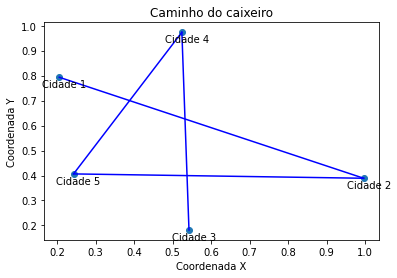

In [8]:
# plotando o grafooo
import matplotlib.pyplot as plt

# Lista de listas com as coordenadas dos pontos
lista_pontos = grafo

# Extrai as coordenadas x e y dos pontos
x = [ponto[0] for ponto in lista_pontos]
y = [ponto[1] for ponto in lista_pontos]
for i, nome in enumerate(melhor_resposta_ever):
    plt.annotate(nome, (x[i], y[i]), textcoords="offset points", xytext=(5,-10), ha='center')

# Plota os pontos
plt.scatter(x, y)

# Liga os pontos com segmentos de reta
for i in range(len(lista_pontos)-1):
    plt.plot([lista_pontos[i][0], lista_pontos[i+1][0]],
             [lista_pontos[i][1], lista_pontos[i+1][1]], 'b-')

# Define os rótulos dos eixos
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.title('Caminho do caixeiro')
# Exibe o gráfico
plt.show()

### Fazendo o gif do caminho do caixeiro viajante

In [13]:
## Essa função depende da lista "melhor_resposta_ever", por isso não pode estar no arquivo "funcoes"
def create_frame(t, xx, yy):    
    """ Função cria cada frame do gif
    Args:
    t= numero do frame
    xx= lista de coordenadas x do ponto
    yy= lista de coordenadas y do ponto
    
    Retorna:
    Gráfico que servirá como frame para o gif"""
    plt.xlim(0, 1) 
    plt.ylim(0, 1)
    # Plota os pontos
    for i, nome in enumerate(melhor_resposta_ever):
        plt.annotate(nome, (x[i], y[i]), textcoords="offset points", xytext=(5,-10), ha='center')
    plt.scatter(x, y)
    plt.title("Gif do caminho do caixeiro")
    plt.plot(xx[:(t+1)], yy[:(t+1)], color = 'grey' )
    plt.plot(xx[t], yy[t], color = 'black', marker = 'o' )
    plt.savefig(f'./Figuras/img_{t}.png', 
                transparent = False,  
                facecolor = 'white'
               )
    plt.close()

In [14]:
for t in range(len(caminhoo_x(x,y))):
    create_frame(t,caminhoo_x(x,y), caminhoo_y(x,y))

In [15]:
import imageio
frames = []
for t in range(len(caminhoo_x(x,y))):
    image = imageio.imread(f'./Figuras/img_{t}.png')
    frames.append(image)

In [16]:
# Criamos e salvando o gif!!!
imageio.mimsave('./Figuras/Gif_do_caixeiro.gif', # output gif
                frames,          # array of input frames
                fps = 20)         # optional: frames per second

<center>
  <img src='./Figuras/Gif_do_caixeiro.gif' style="width:500px;height:400px"/>
</center>  

## Conclusão



Realizando esse experimento, foi possível perceber que a única coisa que difere esse problema do problema do caixeiro viajante "tradicional" é a função seleção! Afinal, no experimento A.06 do caixeiro viajante [1], nós lidamos com um problema de minimização, ou seja, procurávamos o MENOR caminho para o caixeiro percorrer. Para resolvê-lo, utilizamos a função de seleção "elecao_torneio_min".

Já no presente experimento, lidamos com um problema de maximização, isto é, procuramos o MAIOR caminho para o caixeiro percorrer. Logo, para resolvê-lo, foi necessário mudar a função seleção. Dessa vez, utilizamos a função de seleção "selecao_roleta_max". Além disso, fiz algumas modificações, como trocar o melhor_fitness_ja_visto inicial de float(inf) para -float(inf), e tranformar o código que achava o menor fitness em um código que acha o maior fitness, mudando, por exemplo, os nomes das variáveis (o que antes era "menor_fitness" agora é "maior_fitness" e trocar sinais de < por >).


## Referências consultadas



1.  https://github.com/benetao/Redes_Neurais_Isabela_Beneti/blob/main/AlgoritmosGeneticos/experimento%20A.06%20-%20o%20caixeiro%20viajante.ipynb




## Playground

